# **Exercise 1 - K-means from scratch**

(60, 2)


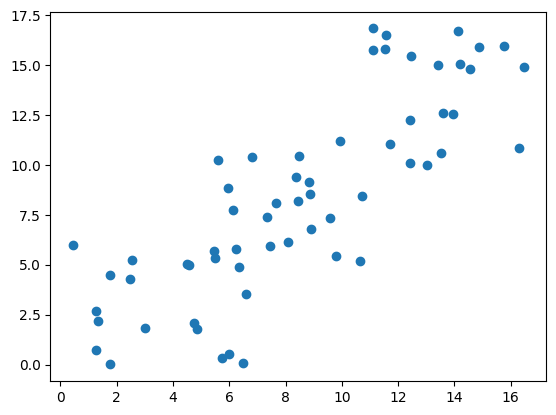

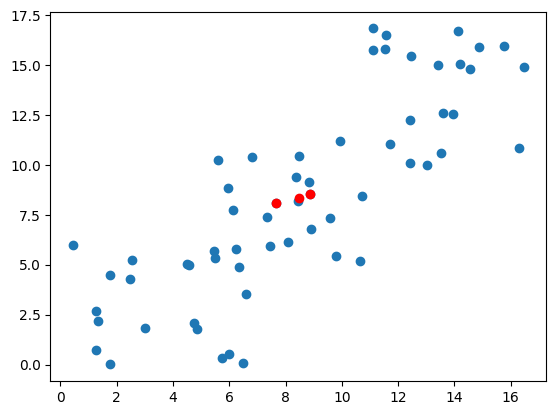

In [7]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

# Load dataset
loaded_points = np.load('Data/k_mean_points.npy')
print(loaded_points.shape)
plt.figure()



plt.scatter(loaded_points[:,0],loaded_points[:,1])

# 1.Specify number of clusters K
k = 3

# 2.initialize centroids
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    np.random.shuffle(points)
    return points[:k_clusters]
# print(initialize_clusters(loaded_points,k))

# 3. Calculate distance from centroids to all points in datasets
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    distances_array = norm(points - centroid, axis=1)
    return distances_array 
# print(calculate_metric(loaded_points,k))

def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    for centroid in centroids_points:
        distances_array = np.array([calculate_metric(points, centroid) ])
    return distances_array

# 4. Assign datapoints to the closest centroids

def assign_centroids(distances: np.ndarray) -> np.ndarray:
    assigned_centroids= np.argmin(distances, axis=0)
    return assigned_centroids

# 5. Calculate objective function
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> float:
    min_distances=distances[assigned_centroids, np.arange(len(assigned_centroids))]
    objective_function_value= np.sum(min_distances)
    return objective_function_value

# 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    new_clusters = []
    for i in range(k_clusters):
        cluster_points = points[assigned_centroids == i]
        if len(cluster_points) == 0:
            new_clusters.append(points[np.random.randint(0, len(points))])
        else:
            new_clusters.append(cluster_points.mean(axis=0))
    new_clusters=np.array(new_clusters)
    return new_clusters

# 7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    centroids = initialize_clusters(points.copy(), k_clusters)
    last_objective = 10000.0
    
    for _ in range(n_of_iterations):
        distances = compute_distances(points, centroids)
        assigned_centroids = assign_centroids(distances)
        objective = calculate_objective(assigned_centroids, distances)
        
        if abs(last_objective - objective) < error:
            break
        
        last_objective = objective
        centroids = calculate_new_centroids(points, assigned_centroids, k_clusters)
    
    return centroids, last_objective

# Running the K-means algorithm
centroids, objective_value = fit(loaded_points, k, 100)
c=assign_centroids(compute_distances(loaded_points, centroids))
# Plot results
plt.figure()
plt.scatter(loaded_points[:, 0], loaded_points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()



# **Exercise 2 - Implementing an Elbow Method**

Text(0, 0.5, 'Sum of squared distance')

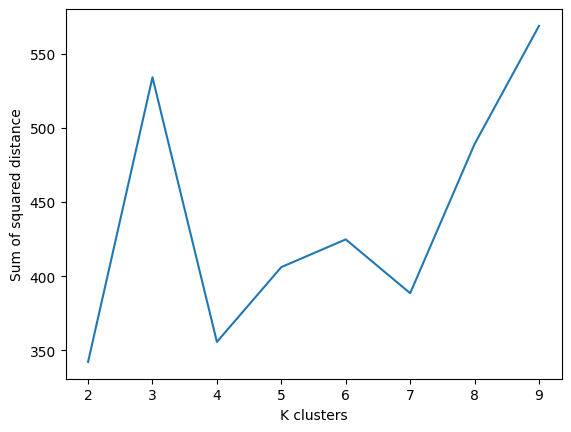

In [29]:
k_all = range(2, 10)
all_objective = []


# Loop to test each value of k
for k in k_all:
    _, objective_value = fit(loaded_points, k, 100)  
    all_objective.append(objective_value)  


plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# **Exercise 3 - Image Compression**

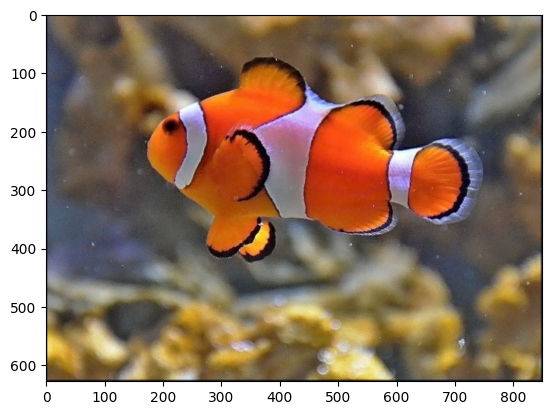

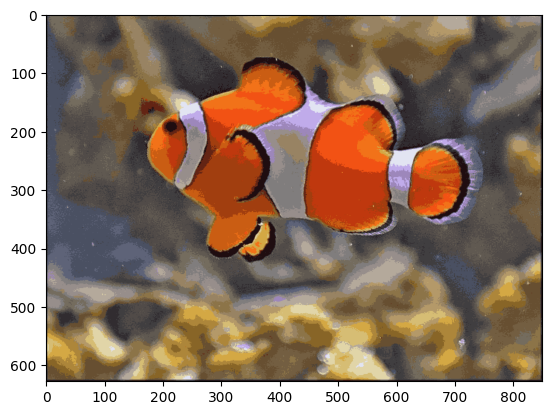

In [16]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

# Load Image
loaded_image = imread('Data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
   
    # Reshape the image 
    image_2d = image.reshape((-1, 3)) # 3 for RGB channels

    # Apply K-Means
    kmeans = KMeans(n_clusters=number_of_colours)
    kmeans.fit(image_2d)

    # Remplace each pixel by the color of the nearest centroid
    compressed_image_2d = kmeans.cluster_centers_[kmeans.labels_]
    # Reshape the image
    image = compressed_image_2d.reshape(image.shape)

    return image
img = compress_image(loaded_image, 30)

plt.figure()
# plt.imshow(img)
plt.imshow(img.astype(np.uint8))
plt.show()